Data Engineering - Group 1
Healthcare - Flu Tracker
---

 

## Extraction

In [1]:
import pandas as pd

# Step 1: Load CSV data into Pandas DataFrames for the two CSV files
file_path_ilinet_state = "ILINet.csv"
file_path_clinical_labs_national = "WHO_NREVSS_Clinical_Labs.csv"
file_path_ilinet_national = "ILINetnational.csv"
file_path_clinical_labs_state = "WHO_NREVSS_Clinical_Labsstate.csv"

df_ilinet_state = pd.read_csv(file_path_ilinet_state)
df_clinical_labs_national = pd.read_csv(file_path_clinical_labs_national)
df_ilinet_national = pd.read_csv(file_path_ilinet_national)
df_clinical_labs_state = pd.read_csv(file_path_clinical_labs_state)

# Display the first few rows of each DataFrame
print("First few rows of ILINet State DataFrame:")
print(df_ilinet_state.head())

print("\nFirst few rows of WHO_NREVSS_Clinical_Labs National DataFrame:")
print(df_clinical_labs_national.head())

print("First few rows of ILINet National DataFrame:")
print(df_ilinet_national.head())

print("\nFirst few rows of WHO_NREVSS_Clinical_Labs State DataFrame:")
print(df_clinical_labs_state.head())

First few rows of ILINet State DataFrame:
  REGION TYPE      REGION  YEAR  WEEK % WEIGHTED ILI %UNWEIGHTED ILI AGE 0-4  \
0      States     Alabama  2010    40              X         2.13477       X   
1      States      Alaska  2010    40              X        0.875146       X   
2      States     Arizona  2010    40              X        0.674721       X   
3      States    Arkansas  2010    40              X        0.696056       X   
4      States  California  2010    40              X         1.95412       X   

  AGE 25-49 AGE 25-64 AGE 5-24 AGE 50-64 AGE 65 ILITOTAL NUM. OF PROVIDERS  \
0         X         X        X         X      X      249                35   
1         X         X        X         X      X       15                 7   
2         X         X        X         X      X      172                49   
3         X         X        X         X      X       18                15   
4         X         X        X         X      X      632               112   

  TOTAL 

In [2]:
df_ilinet_selected_state = df_ilinet_state[['REGION','YEAR','WEEK', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS', 'TOTAL PATIENTS']]

df_clinical_labs_selected_national = df_clinical_labs_national[['REGION TYPE', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'YEAR','WEEK']]

df_ilinet_selected_national = df_ilinet_national[['REGION TYPE', 'YEAR', 'WEEK','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS', 'TOTAL PATIENTS']]

df_clinical_labs_selected_state = df_clinical_labs_state[['REGION', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'YEAR','WEEK']]

# Display the selected DataFrames
print("Selected Columns from ILINet DataFrame:")
print(df_ilinet_selected_state.head())

print("\nSelected Columns from WHO_NREVVS_Clinical_Labs DataFrame:")
print(df_clinical_labs_selected_national.head())

print("Selected Columns from ILINet DataFrame:")
print(df_ilinet_selected_national.head())

print("\nSelected Columns from WHO_NREVVS_Clinical_Labs DataFrame:")
print(df_clinical_labs_selected_state.head())

Selected Columns from ILINet DataFrame:
       REGION  YEAR  WEEK AGE 0-4 AGE 25-49 AGE 25-64 AGE 5-24 AGE 50-64  \
0     Alabama  2010    40       X         X         X        X         X   
1      Alaska  2010    40       X         X         X        X         X   
2     Arizona  2010    40       X         X         X        X         X   
3    Arkansas  2010    40       X         X         X        X         X   
4  California  2010    40       X         X         X        X         X   

  AGE 65 ILITOTAL NUM. OF PROVIDERS TOTAL PATIENTS  
0      X      249                35          11664  
1      X       15                 7           1714  
2      X      172                49          25492  
3      X       18                15           2586  
4      X      632               112          32342  

Selected Columns from WHO_NREVVS_Clinical_Labs DataFrame:
  REGION TYPE  TOTAL SPECIMENS  TOTAL A  TOTAL B  YEAR  WEEK
0    National            12029       84       43  2015    40
1   

## Transformation

In [3]:
def CreateClinicalDF(clinical_data_set):
    #Take the state dataframes and filter for year 2023 and filter/change column types of totals to int
    df_clinical_state = clinical_data_set[clinical_data_set['YEAR'] == 2023]
    #some states do not have data
    df_clinical_state = df_clinical_state[df_clinical_state['TOTAL A'] != 'X']
    df_clinical_state["TOTAL A"] = df_clinical_state["TOTAL A"].astype(int)
    df_clinical_state["TOTAL B"] = df_clinical_state["TOTAL B"].astype(int)
    df_clinical_state["TOTAL SPECIMENS"] = df_clinical_state["TOTAL SPECIMENS"].astype(int)
    return(df_clinical_state)

In [4]:
def CreateILIDF(ili_data_set):
    #Take the state dataframes and filter for year 2023 and filter/change column types of totals to int
    df_ili = ili_data_set[ili_data_set['YEAR'] == 2023]
    #some states do not have data
    df_ili = df_ili[df_ili['ILITOTAL'] != 'X']
    df_ili["ILITOTAL"] = df_ili["ILITOTAL"].astype(int)
    df_ili["TOTAL PATIENTS"] = df_ili["TOTAL PATIENTS"].astype(int)
    return df_ili

In [5]:
#Filter the 2 state data sets
df_ili_state = CreateILIDF(df_ilinet_selected_state)
df_clinical_state = CreateClinicalDF(df_clinical_labs_selected_state)

In [6]:
#get necessary clinical columns
df_clinical_state_grouped = pd.DataFrame(df_clinical_state.groupby(['REGION', 'WEEK'])[["TOTAL A", "TOTAL B", "TOTAL SPECIMENS"]].sum())
#Combine totals into one count of positives
df_clinical_state_grouped['TOTAL POSITIVE CLINICAL'] = df_clinical_state_grouped["TOTAL A"] + df_clinical_state_grouped["TOTAL B"]
#Drop original total columns that have been replaced
df_clinical_state_grouped = df_clinical_state_grouped.drop("TOTAL A", axis=1)
df_clinical_state_grouped = df_clinical_state_grouped.drop("TOTAL B", axis=1)
df_clinical_state_grouped = df_clinical_state_grouped.reset_index()

In [7]:
#get the necessary ili columns
df_ili_state_grouped = pd.DataFrame(df_ili_state.groupby(['REGION', 'WEEK'])[["ILITOTAL", "TOTAL PATIENTS"]].sum())
df_ili_state_grouped = df_ili_state_grouped.reset_index()

In [8]:
#merge the 2 state data sets
merged_state_df = pd.merge(df_ili_state_grouped, df_clinical_state_grouped, on = ['REGION', 'WEEK'], how = 'outer')
merged_state_df['PATIENT COUNT'] = merged_state_df['TOTAL PATIENTS'] + merged_state_df['TOTAL SPECIMENS']
merged_state_df['POSITIVE COUNT'] = merged_state_df['ILITOTAL'] + merged_state_df['TOTAL POSITIVE CLINICAL']
merged_state_df = merged_state_df.drop(['ILITOTAL' , 'TOTAL PATIENTS', 'TOTAL SPECIMENS', 'TOTAL POSITIVE CLINICAL'], axis=1)

In [9]:
def AssignMonth(df):
    #week numbers were estimated using https://calendar.online/calendar-weeks/2023
    #re-assign weeks to month and add to state_df as column
    #add month number to sort by month
    month_num = []
    month = list(df['WEEK'])
    for i in range(len(month)):
        if month[i] < 5:
            month[i] = 'January'
            month_num.append(1)
        elif month[i] < 9:
            month[i] = 'February'
            month_num.append(2)
        elif month[i] < 14:
            month[i] = 'March'
            month_num.append(3)
        elif month[i] < 18:
            month[i] = 'April'
            month_num.append(4)
        elif month[i] < 22:
            month[i] = 'May'
            month_num.append(5)
        elif month[i] < 27:
            month[i] = 'June'
            month_num.append(6)
        elif month[i] < 31:
            month[i] = 'July'
            month_num.append(7)
        elif month[i] < 36:
            month[i] = 'August'
            month_num.append(8)
        elif month[i] < 40:
            month[i] = 'September'
            month_num.append(9)
        elif month[i] < 44:
            month[i] = 'October'
            month_num.append(10)
        elif month[i] < 49:
            month[i] = 'November'
            month_num.append(11)
        elif month[i] < 53:
            month[i] = 'December'
            month_num.append(12)
    df['MONTH'] = month
    df['MONTH NUMBER'] = month_num
    df = df.drop('WEEK', axis=1)

    return df

In [10]:
#Calculate month values
merged_state_df = AssignMonth(merged_state_df)

In [11]:
#create final state df
#We should aknowledge some states aren't reporting every month
merged_state_df = pd.DataFrame(merged_state_df.groupby(['REGION', 'MONTH NUMBER', 'MONTH'])[['PATIENT COUNT','POSITIVE COUNT']].sum()).reset_index()
merged_state_df = merged_state_df.drop('MONTH NUMBER',axis=1)
merged_state_df['PERCENT POSITIVE'] = merged_state_df['POSITIVE COUNT'] / merged_state_df['PATIENT COUNT'] * 100

In [12]:
#Take the national dataframes and filter for year 2023 and filter/change column types of totals to int
df_ili_national = CreateILIDF(df_ilinet_selected_national)
df_clinical_national = CreateClinicalDF(df_clinical_labs_selected_national)

In [13]:
#get necessary clinical columns
df_clinical_national_grouped = pd.DataFrame(df_clinical_national.groupby(['WEEK'])[["TOTAL A", "TOTAL B", "TOTAL SPECIMENS"]].sum())
#Combine totals into one count of positives
df_clinical_national_grouped['TOTAL POSITIVE CLINICAL'] = df_clinical_national_grouped["TOTAL A"] + df_clinical_national_grouped["TOTAL B"]
#Drop original total columns that have been replaced
df_clinical_national_grouped = df_clinical_national_grouped.drop("TOTAL A", axis=1)
df_clinical_national_grouped = df_clinical_national_grouped.drop("TOTAL B", axis=1)
df_clinical_national_grouped = df_clinical_national_grouped.reset_index()

In [14]:
#get the necessary ili columns
df_ili_national_grouped = pd.DataFrame(df_ili_national.groupby(['WEEK'])[["ILITOTAL", "TOTAL PATIENTS"]].sum())
df_ili_national_grouped = df_ili_national_grouped.reset_index()

In [15]:
#merge the 2 national data sets
merged_national_df = pd.merge(df_ili_national_grouped, df_clinical_national_grouped, on = ['WEEK'], how = 'outer')
merged_national_df['PATIENT COUNT'] = merged_national_df['TOTAL PATIENTS'] + merged_national_df['TOTAL SPECIMENS']
merged_national_df['POSITIVE COUNT'] = merged_national_df['ILITOTAL'] + merged_national_df['TOTAL POSITIVE CLINICAL']
merged_national_df = merged_national_df.drop(['ILITOTAL' , 'TOTAL PATIENTS', 'TOTAL SPECIMENS', 'TOTAL POSITIVE CLINICAL'], axis=1)

In [16]:
#Calculate month values
merged_national_df = AssignMonth(merged_national_df)

In [17]:
#create final national df
merged_national_df = pd.DataFrame(merged_national_df.groupby(['MONTH NUMBER', 'MONTH'])[['PATIENT COUNT','POSITIVE COUNT']].sum()).reset_index()
merged_national_df = merged_national_df.drop('MONTH NUMBER',axis=1)
merged_national_df['PERCENT POSITIVE'] = merged_national_df['POSITIVE COUNT'] / merged_national_df['PATIENT COUNT'] * 100

In [18]:
#Make 2 csv fils
merged_state_df.to_csv('combined_state_data.csv')
merged_national_df.to_csv('combined_national_data.csv')

## Database Creation

In [19]:
!mongoimport --type csv -d flu -c combined_national --headerline --drop Resources/combined_national_data.csv
!mongoimport --type csv -d flu -c combined_state --headerline --drop Resources/combined_state_data.csv

2024-01-29T11:07:24.119-0600	connected to: mongodb://localhost/
2024-01-29T11:07:24.121-0600	dropping: flu.combined_national
2024-01-29T11:07:24.139-0600	12 document(s) imported successfully. 0 document(s) failed to import.
2024-01-29T11:07:24.804-0600	connected to: mongodb://localhost/
2024-01-29T11:07:24.806-0600	dropping: flu.combined_state
2024-01-29T11:07:24.830-0600	648 document(s) imported successfully. 0 document(s) failed to import.


In [20]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint

In [21]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [22]:
# confirm that the "flu" database is in MongoDB
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'flu', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [23]:
# assign the database to a variable name
db = mongo['flu']

In [24]:
# review the collections in our new database
print(db.list_collection_names())

['combined_state', 'combined_national']


In [25]:
# assign each collection to a variable
combined_state = db['combined_state']
combined_national = db['combined_national']

## Exploratory Analysis

In [28]:
# 'combined_national' is a MongoDB collection
combined_national_data = list(db['combined_national'].find())

# Convert the data to DataFrames
combined_national_df = pd.DataFrame(combined_national_data)

# Define the custom order for months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert the 'MONTH' column to categorical with the specified order
combined_national_df['MONTH'] = pd.Categorical(combined_national_df['MONTH'], categories=month_order, ordered=True)


# Sort the DataFrame by the 'MONTH' column
combined_national_df = combined_national_df.sort_values(by='MONTH')

combined_national_df

,_id,,MONTH,PATIENT COUNT,POSITIVE COUNT,PERCENT POSITIVE
4,65b99dc6851d57b53f40e641,0,January,9221974,296436,3.214453
2,65b99dc6851d57b53f40e63f,1,February,9372154,243463,2.597727
0,65b99dc6851d57b53f40e63d,2,March,11767869,277374,2.357045
1,65b99dc6851d57b53f40e63e,3,April,9238102,186763,2.021660
3,65b99dc6851d57b53f40e640,4,May,9125754,178301,1.953822
5,65b99dc6851d57b53f40e642,5,June,10951471,173815,1.587138
6,65b99dc6851d57b53f40e643,6,July,8652484,106062,1.225798
9,65b99dc6851d57b53f40e646,7,August,11175211,177025,1.584086
8,65b99dc6851d57b53f40e645,8,September,9242530,189546,2.050802
7,65b99dc6851d57b53f40e644,9,October,10234657,247356,2.416847


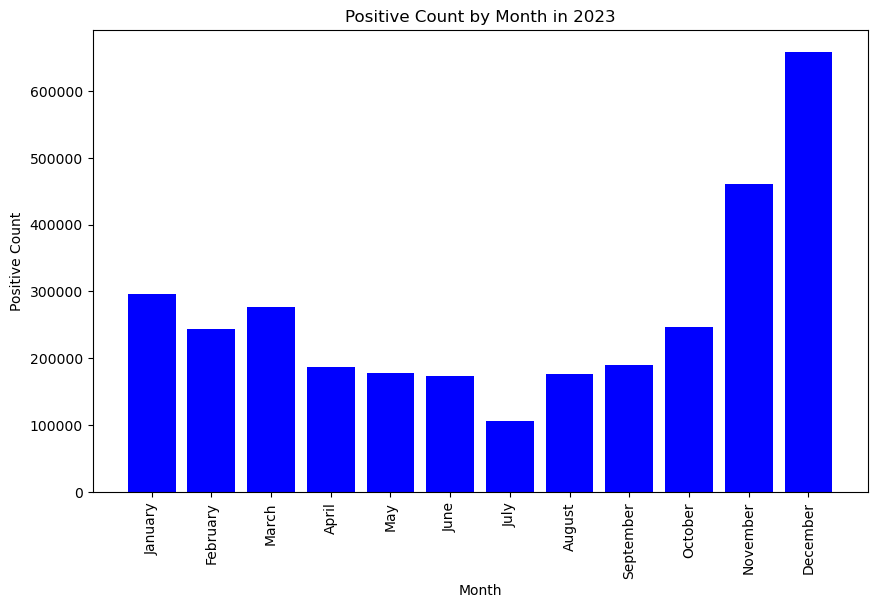

In [29]:
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(combined_national_df['MONTH'], combined_national_df['POSITIVE COUNT'], color='blue')
plt.xlabel('Month')
plt.ylabel('Positive Count')
plt.title('Positive Count by Month in 2023')
plt.xticks(rotation="vertical")  # Rotate x-axis labels for better visibility
plt.show()

In [30]:
# 'combined_state' is a MongoDB collection
combined_state_data = list(db['combined_state'].find())

# Convert the data to DataFrames
combined_state_df = pd.DataFrame(combined_state_data)
combined_state_df

,_id,,REGION,MONTH,PATIENT COUNT,POSITIVE COUNT,PERCENT POSITIVE
0,65b99dc60aabfd96e0177161,7,Alabama,August,256072.0,5484.0,2.141585
1,65b99dc60aabfd96e0177162,1,Alabama,February,197516.0,5086.0,2.574981
2,65b99dc60aabfd96e0177163,8,Alabama,September,184882.0,4476.0,2.421004
3,65b99dc60aabfd96e0177164,9,Alabama,October,169917.0,4601.0,2.707793
4,65b99dc60aabfd96e0177165,10,Alabama,November,220559.0,11099.0,5.032214
...,...,...,...,...,...,...,...
643,65b99dc60aabfd96e01773e4,641,Wyoming,June,0.0,0.0,
644,65b99dc60aabfd96e01773e5,644,Wyoming,September,0.0,0.0,
645,65b99dc60aabfd96e01773e6,645,Wyoming,October,6410.0,310.0,4.836193
646,65b99dc60aabfd96e01773e7,646,Wyoming,November,15182.0,808.0,5.322092


In [31]:
# Convert 'MONTH' to a categorical data type to ensure correct ordering
combined_state_df['MONTH'] = pd.Categorical(combined_state_df['MONTH'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Replace NaN values with a large negative value
combined_state_df['POSITIVE COUNT'].fillna(-1e9, inplace=True)

# Find the month with the maximum positive cases percentage for each region
max_positive_month_df = combined_state_df.loc[combined_state_df.groupby('REGION')['POSITIVE COUNT'].idxmax(skipna=False)]

# Create a new DataFrame with REGION, MONTH, and positive percentage
result_df = max_positive_month_df[['REGION', 'MONTH', 'POSITIVE COUNT']].reset_index(drop=True)

# Print the resulting DataFrame
result_df

,REGION,MONTH,POSITIVE COUNT
0,Alabama,December,16972.0
1,Alaska,January,0.0
2,Arizona,December,16330.0
3,Arkansas,December,3234.0
4,California,December,90128.0
5,Colorado,December,16518.0
6,Connecticut,December,7977.0
7,Delaware,June,0.0
8,District of Columbia,January,0.0
9,Florida,November,68139.0


In [32]:
# Get the list of unique states from the database and sort them alphabetically
unique_states = sorted(combined_state.distinct('REGION'))

# Write an aggregation query to find the number of patients and positive patients for all states
query = [
    {'$group': {
        '_id': '$REGION',
        'total_patient_count': {'$sum': '$PATIENT COUNT'},
        'total_positive_count': {'$sum': '$POSITIVE COUNT'}
    }},
    {'$sort': {'_id': 1}}  # Sort by region name in ascending order
]

# Execute the aggregation query
result = list(combined_state.aggregate(query))

In [34]:
# Import dependencies
from pprint import pprint
# Print the first 10 results
pprint(result[0:10])

[{'_id': 'Alabama',
  'total_patient_count': 2421705.0,
  'total_positive_count': 67913.0},
 {'_id': 'Alaska', 'total_patient_count': 0.0, 'total_positive_count': 0.0},
 {'_id': 'Arizona',
  'total_patient_count': 1897638.0,
  'total_positive_count': 43167.0},
 {'_id': 'Arkansas',
  'total_patient_count': 796057.0,
  'total_positive_count': 15418.0},
 {'_id': 'California',
  'total_patient_count': 14492313.0,
  'total_positive_count': 497350.0},
 {'_id': 'Colorado',
  'total_patient_count': 2616016.0,
  'total_positive_count': 75620.0},
 {'_id': 'Connecticut',
  'total_patient_count': 2288347.0,
  'total_positive_count': 42231.0},
 {'_id': 'Delaware', 'total_patient_count': 0.0, 'total_positive_count': 0.0},
 {'_id': 'District of Columbia',
  'total_patient_count': 0.0,
  'total_positive_count': 0.0},
 {'_id': 'Florida',
  'total_patient_count': 13168709.0,
  'total_positive_count': 476091.0}]


In [35]:
# Extract the fields from the _id so they're in separate columns in a Pandas DataFrame
aggregated_df = pd.json_normalize(result)
aggregated_df.head()

,_id,total_patient_count,total_positive_count
0,Alabama,2421705.0,67913.0
1,Alaska,0.0,0.0
2,Arizona,1897638.0,43167.0
3,Arkansas,796057.0,15418.0
4,California,14492313.0,497350.0


In [36]:
# Rename the columns
aggregated_df = aggregated_df.rename(columns={"_id": "Region",
                                              "total_patient_count": "Total number of patients",
                                              "total_positive_count": "Total number of positive patients"})
aggregated_df.head()

,Region,Total number of patients,Total number of positive patients
0,Alabama,2421705.0,67913.0
1,Alaska,0.0,0.0
2,Arizona,1897638.0,43167.0
3,Arkansas,796057.0,15418.0
4,California,14492313.0,497350.0


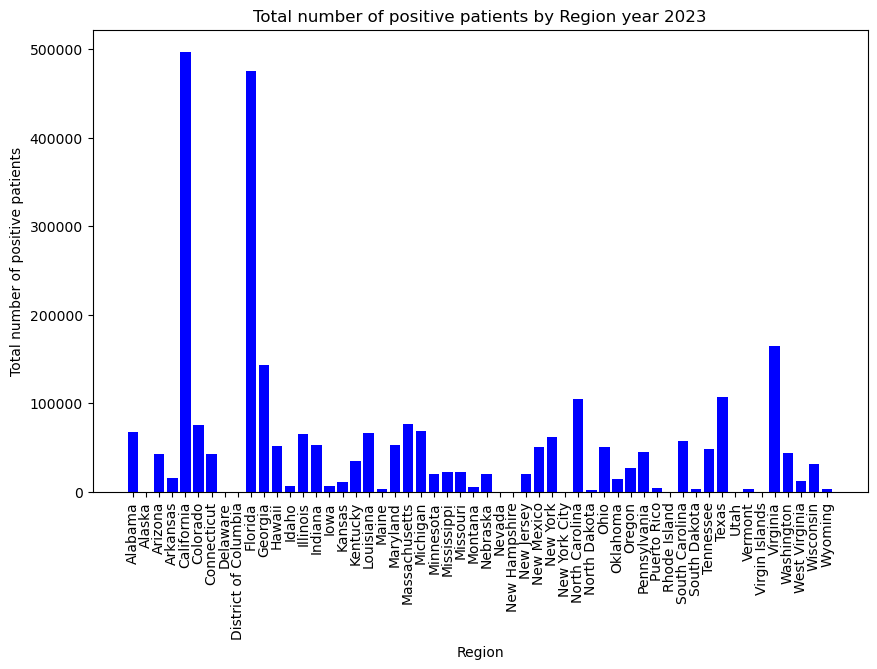

In [37]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(aggregated_df['Region'], aggregated_df['Total number of positive patients'], color='blue')
plt.xlabel('Region')
plt.ylabel('Total number of positive patients')
plt.xticks(rotation="vertical")  # Rotate x-axis labels for better visibility
plt.title('Total number of positive patients by Region year 2023')
plt.show()